In [ ]:
#!pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import timeit
import math
from numba import jit
from PIL import Image

In [ ]:
!pip install gdown
import gdown
supermario_path = 'https://drive.google.com/uc?id=14SQwOXcNzCseSvHWgpLDwv3-C16JTZpB'
mario_path = 'https://drive.google.com/uc?id=16WybrWHRrxXXIlv9fK7u4kdMYNHWY7H1'
gdown.download(supermario_path, 'super_mario.jpg', quiet=False)
gdown.download(mario_path, 'mario.png', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=14SQwOXcNzCseSvHWgpLDwv3-C16JTZpB
To: /content/super_mario.jpg
100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 15.8k/15.8k [00:00<00:00, 11.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=16WybrWHRrxXXIlv9fK7u4kdMYNHWY7H1
To: /content/mario.png
100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 4.15k/4.15k [00:00<00:00, 6.24MB/s]


'mario.png'

# Transformaciones lineales

## IntrudocciÃ³n

Sean $(w, z)$ y $(x, y)$ dos sistemas coordenados, denominados el espacio de entrada y espacio de salida respectivamente.

Una transformaciÃ³n geomÃ©trica de coordenadas define al mapeo desde el espacio de entrada al de salida de la forma:

$$(x, y) = T{(w, z)}$$

donde $T {Â·}$ se llama transformaciÃ³n o mapeo directo. Si $T {Â·}$ posee una inversa, el mapeo inverso es aquel que traslada los puntos desde el espacio de salida al de entrada:

$$(x, y) = T^{âˆ’1}{(w, z)}$$

Las transformaciones geomÃ©tricas se definen en tÃ©rminos de la transformaciÃ³n de coordenadas


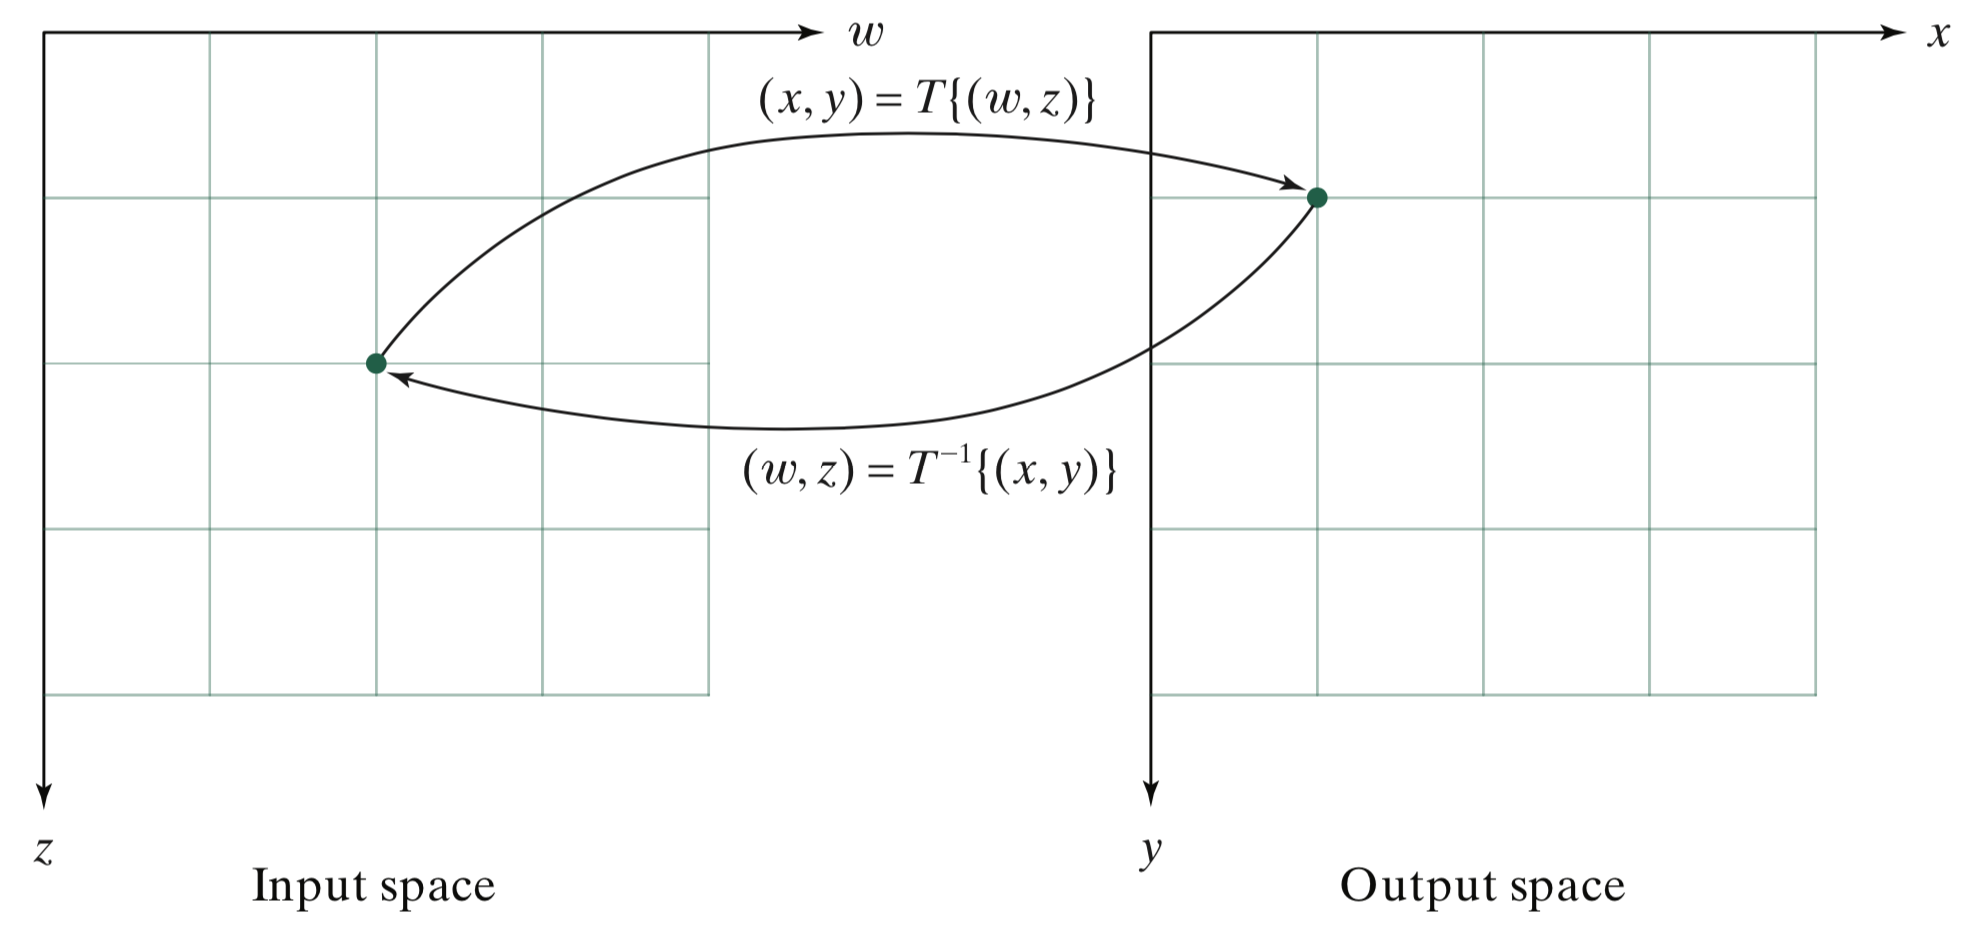

Veamos una animaciÃ³n ðŸ†’
https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=3&ab_channel=3Blue1Brown

### Ejemplo


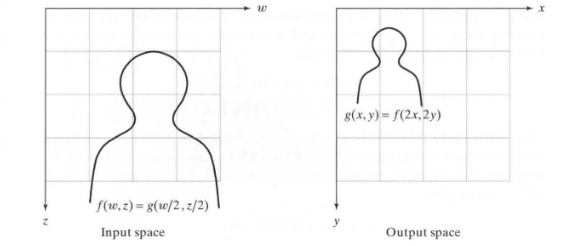

La figura muestra el efecto de aplicar la transformaciÃ³n lineal definida por $$(x, y) = T {(w, z)} = (w/2, z/2) $$
 que escala
la curva original encogiÃ©ndola a la mitad



ðŸ§  **Para pensar ahora:** Â¿CÃ³mo puede definirse esta transformaciÃ³n y su inversa de forma matricial?


### **Spoiler**:



$
\begin{pmatrix} x \\ y \end{pmatrix} =
T \begin{pmatrix} w \\ z \end{pmatrix} =
\begin{pmatrix}
\frac{1}{2} & 0 \\
0 & \frac{1}{2}
\end{pmatrix}
\begin{pmatrix} w \\ z \end{pmatrix}
$


$
\begin{pmatrix} w \\ z \end{pmatrix} =
T^{-1} \begin{pmatrix} x \\ y \end{pmatrix} =
\begin{pmatrix}
2 & 0 \\
0 & 2
\end{pmatrix}
\begin{pmatrix} x \\ y \end{pmatrix}
$


In [ ]:
T = np.array([[0.5, 0],
              [0, 0.5]])

T_inv = np.array([[2,0],
                 [0,2]])

# Chequeamos que son inversa una de la otra (con una tolerancia)
np.allclose(T @ T_inv, np.eye(2))
np.allclose(T_inv @  T, np.eye(2))

True

# Ejercicios "en papel"


## Deformaciones (shears)


En este caso se trasladan las coordenadas horizontales un factor que depende de las verticales. Las coordenadas verticales quedan sin modificaciÃ³n, provocando una deformacion de la salida. Dado un factor $k$, se define una deformaciÃ³n en x como:

$$(x, y) = T {(w, z)} = (w + kz, z) $$

ðŸ“” Resolver:

a) Encontrar la expresiÃ³n de la matriz $T$ y $T^{âˆ’1}$

 $$ T = ...$$

 $$ T^{âˆ’1} = ... $$

b) De forma anÃ¡loga puede definirse la deformaciÃ³n en y modificando las coordenadas verticales. Encontrar la expresiÃ³n de la matriz para la transformaciÃ³n y su inversa

 $$ T = ...$$

 $$ T^{âˆ’1} = ... $$




## Rotaciones


Sea $R_{\theta} : \mathbb{R}^2 \to \mathbb{R}^2 $ la rotaciÃ³n de un Ã¡ngulo $\theta$ alrededor del origen como muestra la figura





Screenshot 2025-03-30 at 19-23-18 labo03-TransformacionesLineales.pdf.png

ðŸ§  **Para pensar ahora:** Â¿CÃ³mo podemos definir esta transformaciÃ³n de forma matricial?

**HINT:** Estudiar lo que deberÃ­a ocurrir con los vectores canÃ³nicos. Observar que, ademÃ¡s, esta transformaciÃ³n no deforma los vectores (es decir, preserva su norma).

ðŸ“” Resolver:

a) Encontrar la expresiÃ³n para la matriz de $R_{\theta}$

## TransformaciÃ³n proyectiva

En los ejercicios precedentes se estudiÃ³ el caso de matrices de transformaciÃ³n que encogÃ­an, dilataban o rotaban la posiciÃ³n de puntos iniciales en un nuevo espacio a travÃ©s del Ã¡lgebra lineal.  

Estas transformaciones son un caso particular de la **transformaciÃ³n proyectiva**, denominada **afÃ­n**. En general, se pueden formalizar las operaciones mediante:  


$$
\begin{pmatrix} x \\ y \end{pmatrix} =
T \begin{pmatrix} w \\ z \end{pmatrix} +
\begin{pmatrix} b_1 \\ b_2 \end{pmatrix}
$$

$$
\begin{pmatrix} x \\ y \end{pmatrix} =
\begin{pmatrix}
a_{11} & a_{12}  \\
a_{21} & a_{22} \\
\end{pmatrix}
\begin{pmatrix} w \\ z  \end{pmatrix}  +
\begin{pmatrix} b_1 \\ b_2 \end{pmatrix}
$$


donde hemos agregado la posibilidad de realizar una traslaciÃ³n lineal de las coordenadas origen en los dos ejes mediante los valores constantes $(b_1, b_2)$.  

A travÃ©s de estas transformaciones se puede: escalar, rotar, trasladar o deformar. Por conveniencia matemÃ¡tica y computacional, todas estas transformaciones pueden expresarse en **coordenadas homogÃ©neas** utilizando una matriz de $3 \times 3$:  

$$
\begin{pmatrix} x \\ y \\ 1 \end{pmatrix} =
\begin{pmatrix}
a_{11} & a_{12} & b_1 \\
a_{21} & a_{22} & b_2 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix} w \\ z \\ 1 \end{pmatrix}
$$

Al agregar el 1 a las coordenadas, las convertimos en **homogÃ©neas**.





ðŸ“” Resolver:

a) Encontrar la expresiÃ³n para la matriz de rotaciÃ³n y deformaciÃ³n afÃ­n

# Ejercicios "en compu"
ðŸ“£ El objetivo de esta parte es utilizar los conocimientos teÃ³ricos de transformaciones lineales para resolver problemas elementales en un caso prÃ¡ctico. En particular, estudiaremos algunas operaciones que pueden hacerse sobre imÃ¡genes.

AdemÃ¡s de practicar la escritura de cÃ³digo con python y **la biblioteca NUMPY** (pueden chequear mÃ¡s en esta publicaciÃ³n de, nada mÃ¡s y nada menos, la revista [nature](https://www.nature.com/articles/s41586-020-2649-2/figures/1)).

ðŸ§  **Para pensar ahora:** Â¿Por quÃ© nos interesa tanto usar numpy?Â¿Tiene algo de malo usar las listas de python?



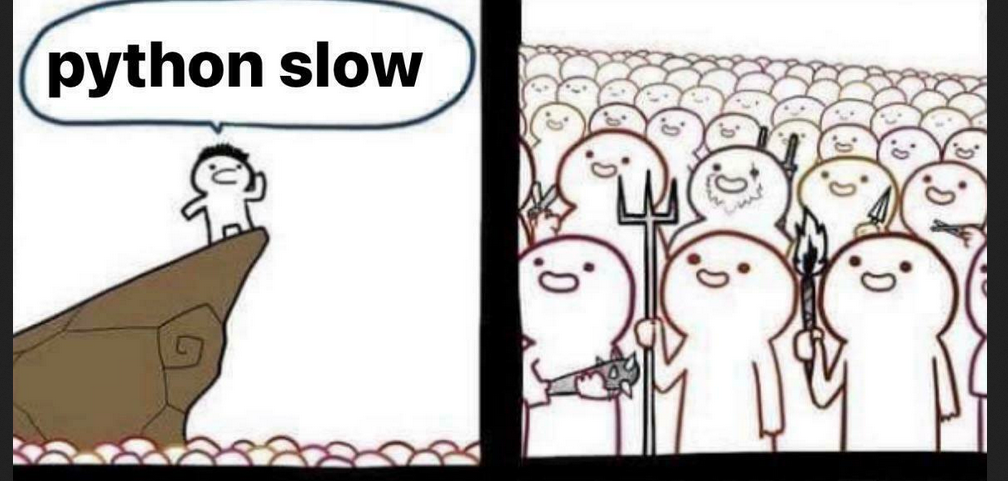

In [ ]:
def pure_mean(X):
  s = 0
  n = X.size
  for row in X:
    for x in row:
      s += x
  return s/n

n = 100
X = np.random.rand(50,50)
pure_mean(X), np.mean(X)

(np.float64(0.5057504483501201), np.float64(0.5057504483501194))

In [ ]:
%timeit -r 10 np.mean(X)

8.35 Âµs Â± 1.95 Âµs per loop (mean Â± std. dev. of 10 runs, 100000 loops each)


In [ ]:
%timeit -r 10 pure_mean(X)

361 Âµs Â± 14.1 Âµs per loop (mean Â± std. dev. of 10 runs, 1000 loops each)


Â¿?

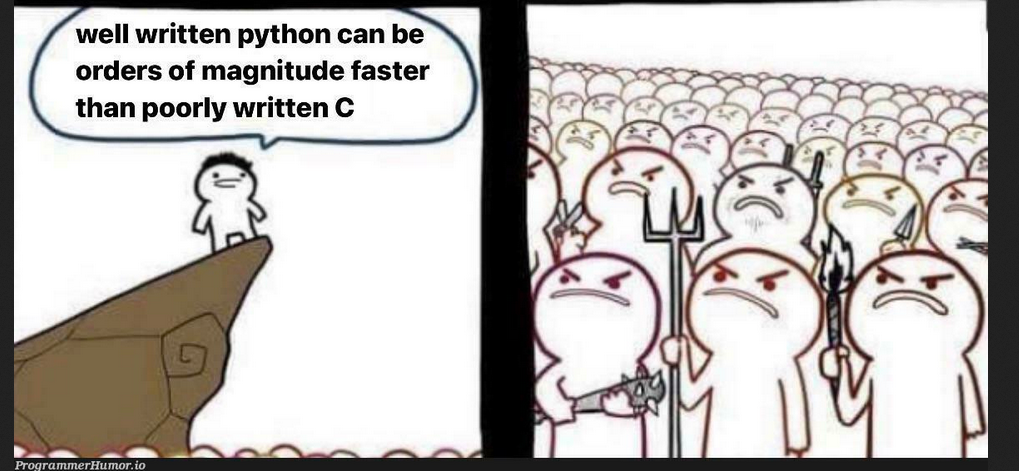

## ImÃ¡genes

Esta aplicaciÃ³n ilustra algunos de los problemas con los que hay que lidiar al pasar al mundo discreto de la computadora.

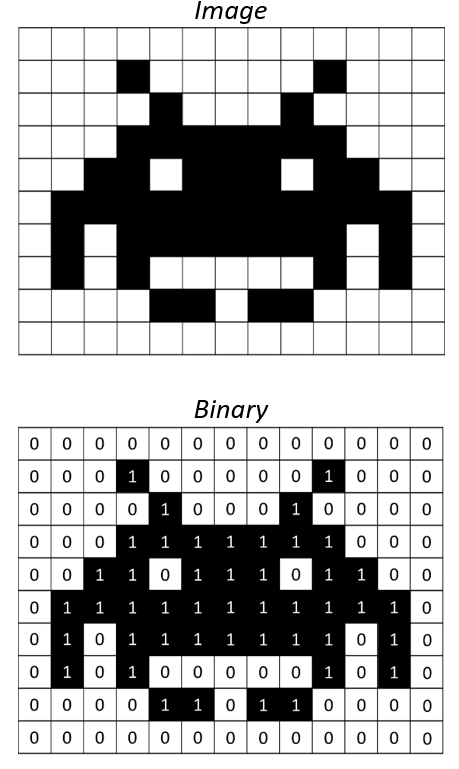

Podemos pensar a la imagen como un muestreo de una funciÃ³n de intensidad definida sobre un rectÃ¡ngulo de R2

addXtoUpperSmiley1.png


Vimos que una imÃ¡gen digital binaria puede representarse en la computadora como una matriz de bits.

TÃ­picamente, para representar mÃ¡s intensidades se suelen usar enteros en el rango $[0,255]$ o floats en $[0,1]$. Notar tambiÃ©n que, por convenciÃ³n, el Ã³rigen de coordenadas se encuentra en la esquina superior izquierda.


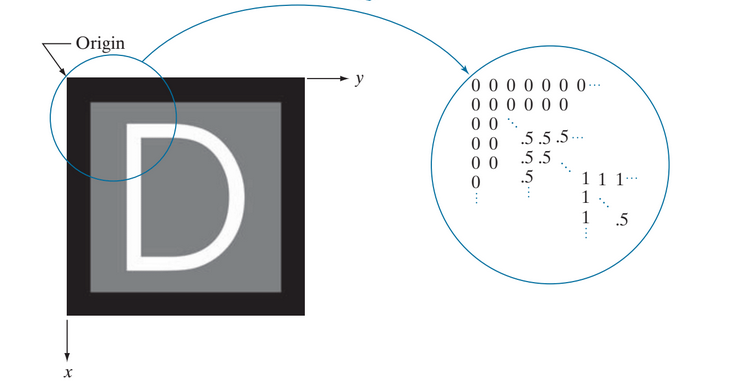

Podemos generar y mostrar imÃ¡genes a partir de una matriz. Por ejemplo:

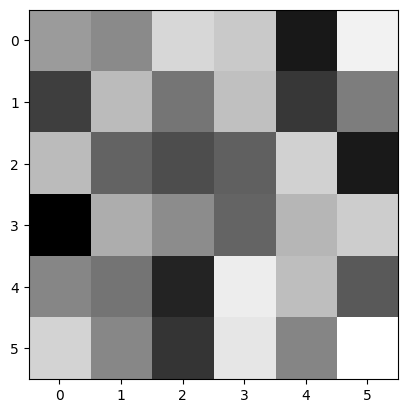

In [ ]:
from matplotlib.gridspec import GridSpec

# Armamos una matriz de enteros random entre 0 y 255
img_test = np.random.randint(0, 255, size=(6, 6))

# Ploteamos
plt.imshow(img_test, cmap='gray')

In [ ]:
# Podemos leer imagenes directamente de un archivo a una matriz de numpy
img_path = './super_mario.jpg'
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2GRAY)
image.shape

# Podemos usar la imagen original a color, por simplicidad nos quedamos con grises
#image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGB)

(575, 570)

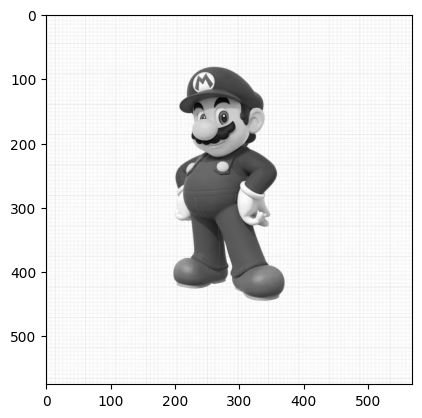

In [ ]:
plt.imshow(image, cmap='gray')

## Escalado de imÃ¡genes


Queremos escalar/estirar una imagen. Una idea intuitiva podrÃ­a ser aplicarle una transformaciÃ³n lineal que escale la grilla de sus coordenadas. De esta forma un pixel con intensidad $p$ y coordenada $(i,j)$ es trasladado a la posiciÃ³n $T(i,j)$. Luego, seteamos la intesidad de $T(i,j)$ con el mismo valor $p$.

### Direct mapping

ðŸ“” Resolver:

a) Implementar la estrategia anterior para escalar una imagen dado un factor de escala. No utilizar operaciones de numpy para este caso

b) Repetir lo anterior utilizando multiplicaciÃ³n matricial de numpy (ver [np.dot](https://numpy.org/doc/2.1/reference/generated/numpy.dot.html))

c) Comparar los tiempos de ejecuciÃ³n de ambos algoritmos tomando la media de varias corridas (ver  [timeit](https://docs.python.org/es/3.13/library/timeit.html)). Discutir posibles explicaciones para lo ocurrido.

d) Replicar c) pero activando [numba](https://numba.pydata.org/).

In [ ]:
def scale(image, factor):
    h, w = image.shape[0], image.shape[1]
    new_h, new_w = int(h*factor), int(w*factor)

    if len(image.shape) > 2:
      size = (new_h, new_w, image.shape[2])
    else:
      size = (new_h, new_w)

    output = np.zeros(size, dtype=np.uint8)
    S = np.array([[factor, 0],
                 [0, factor]])

    output = np.zeros(size, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            new_x, new_y = (S@np.array([i,j])).flatten().astype(np.int16)
            output[new_x,new_y]=image[i,j]

    return output

@jit(nopython=True)
def scale_puro(image, factor):
    h, w = image.shape[0], image.shape[1]
    new_h, new_w = int(h*factor), int(w*factor)
    output = np.zeros((new_h, new_w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            new_x = factor*i
            new_y = factor*j
            output[new_x,new_y] = image[i,j]

    return output

In [ ]:
%timeit -r 10 scale(img_test, 2)

195 Âµs Â± 33.8 Âµs per loop (mean Â± std. dev. of 10 runs, 10000 loops each)


In [ ]:
%timeit -r 10 scale_puro(img_test, 2)

1.15 Âµs Â± 248 ns per loop (mean Â± std. dev. of 10 runs, 1000000 loops each)


Veamos que pinta tiene el escalado sobre algunas imÃ¡genes

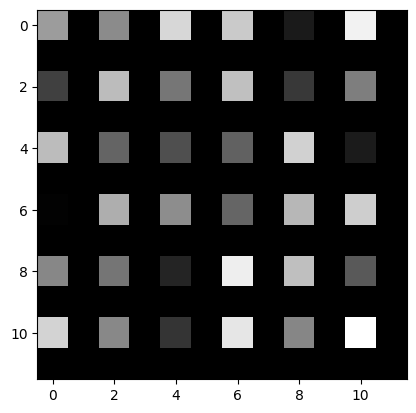

In [ ]:
output = scale_puro(img_test,2)
plt.imshow(output, cmap='gray')
plt.show()

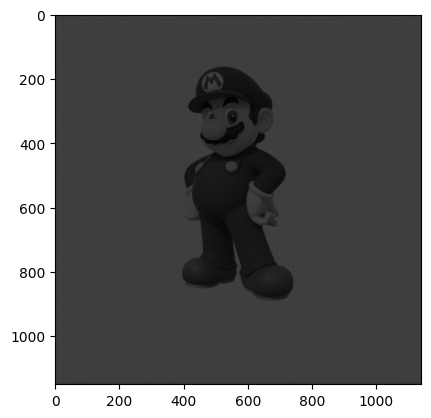

In [ ]:
img_path = './super_mario.jpg'
factor = 2
# Leer img
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2GRAY)

# Rotar
output = scale(image, factor)

# Plot
plt.imshow(image)
plt.imshow(output, cmap='gray')
plt.show()

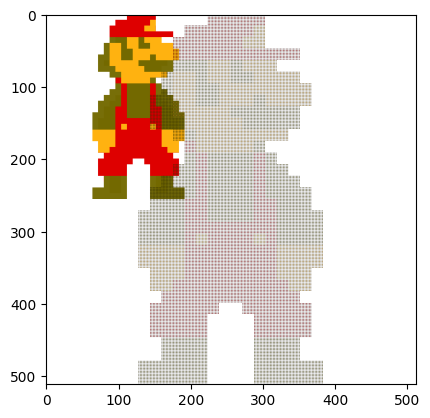

In [ ]:
img_path = './mario.png'
factor = 2
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGBA)
output = scale(image, factor)
plt.imshow(image)
plt.imshow(output, cmap='gray')
plt.show()

ðŸ§  **Para pensar ahora:** Vemos que las imagenes tienen "huecos" al agrandarlas Â¿a quÃ© se debe este efecto indeseado?


### Inverse mapping

Una forma de evitar lo anterior es aprovechar que la transformaciÃ³n definida tiene inversa. En vez de recorrer el espacio de coordenadas original y aplicar $T$, podemos hacerlo al revÃ©s: nos paramos en el algÃºn punto $p$ del espacio de llegada , le aplicamos la inversa de T obteniendo $p'$. Luego la intensidad de $p$ queda determinada por el valor de la de $p'$.

De esta forma nos aseguramos que a cada posiciÃ³n le corresponde otra del espacio original y no quedan "huecos".


ðŸ“” Resolver:

a) Implementar la estrategia anterior para escalar una imagen dado un factor de escala.

**ObservaciÃ³n**: Es posible utilizar la funcion np.linalg.inv para halla la inversa (si existe). Sin embargo, en este caso es mÃ¡s directo pensar como quedarÃ­a la inversa de T dado que es una matriz diagonal.


In [ ]:
#@jit(nopython=True)
def scale_inverse(image, factor):
    h, w = image.shape[0], image.shape[1]
    new_h, new_w = int(h*factor), int(w*factor)
    if len(image.shape) > 2:
      size = (new_h, new_w, image.shape[2])
    else:
      size = (new_h, new_w)

    output = np.zeros(size, dtype=np.uint8)
    S = np.array([[1/factor, 0],[0, 1/factor]])
    for i in range(new_h):
        for j in range(new_w):
            old_x, old_y = (S@np.array([i,j])).flatten().astype(np.int16)
            if 0 <= old_x < h and 0 <= old_y < w and old_x>=0 and old_y>=0:
                output[i,j]=image[old_x,old_y]

    return output

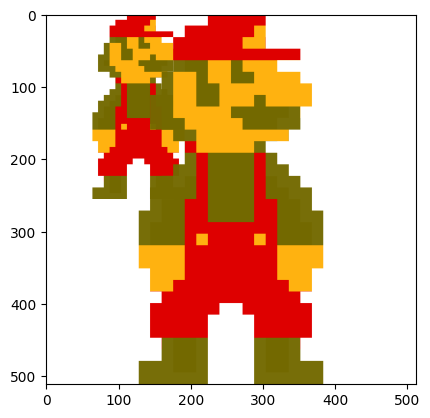

In [ ]:
img_path = './mario.png'
factor = 2
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGBA)
output = scale_inverse(image, factor)
plt.imshow(image)
plt.imshow(output)
plt.show()

ðŸ§  **Para pensar ahora:** La imagen ya no tiene huecos pero, Â¿que podrÃ­a decirse de la "calidad" obtenida con esta tÃ©cnica? Poner especial atenciÃ³n en los bordes


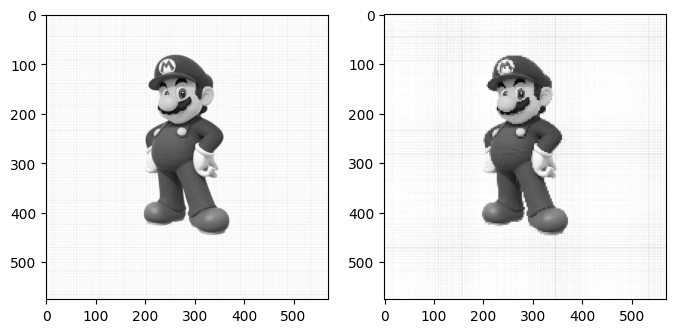

In [ ]:
img_path = './super_mario.jpg'
factor = 3
# Read img
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2GRAY)
image_downsampled = image[::factor,::factor]
# Rotate
output = scale_inverse(image_downsampled, factor)

# Plot
fig, ax = plt.subplots(1,2, figsize=(8, 10))
ax[0].imshow(image,cmap='gray')
ax[1].imshow(output, cmap='gray')
plt.show()

**ObservaciÃ³n**: Es posible conseguir mejores resultados utilizando otras tÃ©cnicas que escapan al scope de este taller. Una de ellas es tomar un promedio pesado de la intensidad de los vecinos de $p'$ para determinar el valor de $p$ (ver bilinear interpolation)

# RotaciÃ³n de imagenes

Tomando una idea parecida a la usada inicialmente para escalar una imagen mediante direct mapping, podemos simplemente considerar una transformaciÃ³n que rote las coordenadas y aplicarla a la imagen.

Sin embargo, hay que tener presente que la transformaciÃ³n que definimos lo hace con **respecto al origen de coordenadas**, que en las imÃ¡genes quedarÃ­a arriba a la izquierda. Necesitamos:

* Trasladar el origen del espacio de coordenadas al centro de la imagen primero.
* Aplicar la transformaciÃ³n de rotaciÃ³n conocida
* Restablecer el origen de coordenadas

Finalmente, es posible que para algunos Ã¡ngulos la imagen rotada no entre en la grilla original. Por lo tanto, se suele agrandar lo suficiente el tamaÃ±o de la imagen de salida.



## RotaciÃ³n matricial (direct mapping)


ðŸ“” Resolver:

a) Implementar la estrategia anterior para rota una imagen dado Ã¡ngulo $\theta$. Pueden considerar el esquema de cÃ³digo mÃ¡s abajo que utiliza loops, pero sugerimos pensar como serÃ­a la variante evitÃ¡ndolos.

b) Implementar la rotaciÃ³n de imÃ¡genes utilizando matrices de rotaciÃ³n afin


In [ ]:
# FunciÃ³n que puede ser util para empezar a pensar como evitar loops
def meshgrid(x, y):
    A = np.empty(shape=(2,x.size*y.size))
    for j in range(y.size):
        for k in range(x.size):
            A[0,j*y.size + k] = x[k]
            A[1,j*y.size + k] = y[j]

    return A
h, w = 100, 100
A = meshgrid(np.linspace(0, h-1, h), np.linspace(0,w-1,w))
A

In [ ]:
#@jit(nopython=True)
def rotate(image, angle):

    angle = math.radians(angle)
    cos, sin = np.cos(angle), np.sin(angle)
    h, w = image.shape[0], image.shape[1]

    # La nueva imagen deberÃ­a ser mÃ¡s grande para que la rotaciÃ³n tenga suficiente lugar
    new_h  = int(np.round(np.abs(image.shape[0]*cos)+np.abs(image.shape[1]*sin))+1)
    new_w  = int(np.round(np.abs(image.shape[1]*cos)+np.abs(image.shape[0]*sin))+1)

    # Por si la imagen es a color
    if len(image.shape) > 2:
      size = (new_h, new_w, image.shape[2])
    else:
      size = (new_h, new_w)

    output = np.zeros(size, dtype=np.uint8)

    original_centre = np.array([np.round(((h+1)/2)-1), np.round(((w+1)/2)-1)])
    new_centre = np.array([np.round(((new_h+1)/2)-1), np.round(((new_w+1)/2)-1)])

    # Matriz R
    R = ... # COMPLETAR

    for i in range(h):
        for j in range(w):
            # Centrar
            p = ... # COMPLETAR

            # Rotar
            p = ... # COMPLETAR

            # Trasladar a nuevo origen
            new_x, new_y = ... # COMPLETAR
            if 0 <= new_x < new_w and 0 <= new_y < new_h and new_x>=0 and new_y>=0:
                output[new_x,new_y] = image[i,j]

    return output

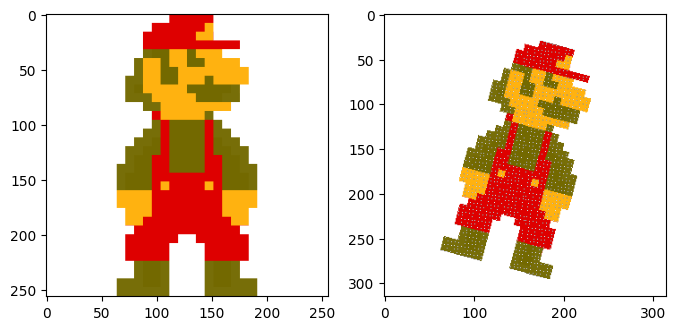

In [ ]:
img_path = './super_mario.jpg'
angle = 15
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2GRAY)

# Rotate
output = rotate(image, angle)

# Plot
fig, ax = plt.subplots(1,2, figsize=(8, 10))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(output, cmap='gray')
plt.show()

ðŸ§  **Para pensar ahora:** La imagen rotada tiene los famoso "huecos". Â¿Por quÃ©?


## RotaciÃ³n mediante shears

Una tÃ©cnica que logra minimizar el problema de los huecos en la rotaciÃ³n utiliza Ãºnicamente composiciÃ³n de shears para lograrlo.

Si consideramos la aplicaciÃ³n sucesiva de 3 shears arbitrarios tales que sean equivalentes a la matriz de rotaciÃ³n:

$$
\begin{bmatrix}
1 & \alpha \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
\beta & 1
\end{bmatrix}
\begin{bmatrix}
1 & \gamma \\
0 & 1
\end{bmatrix}
=
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
$$

La idea (y una forma super eficiente de implementarla) fue propuesta hace un tiempito, en este [paper](https://graphicsinterface.org/wp-content/uploads/gi1986-15.pdf) por Alan Paeth


ðŸ“” Resolver (papel):

a) Verificar que $\alpha = \gamma = \frac{cos - 1}{sen}$ y $\beta = sin$

**ObservaciÃ³n**: Dado que $\frac{cos-1}{sen}$ puede ser inestable cerca del 0 (**wild cancelaciÃ³n catastrÃ³fica appears!**), se prefiere utilizar $\frac{-tan}{2}$

ðŸ““ Resolver (cÃ³digo):

b) Implementar dos funciones para aplicar un shear, vertical y otro horizontal, a una imagen

c) Implementar la rotaciÃ³n de imagenes mediante el algoritmo de 3-shears. Tener en cuenta que se busca rotar la imagen sobre su punto central (como se hizo con la rotaciÃ³n directa en la versiÃ³n de rotaciÃ³n usando direct mapping)
